### Init cells

In [3]:
import blackhc.notebook

Appended C:\Users\black\PycharmProjects\feldman\src to paths
Switched to directory C:\Users\black\PycharmProjects\feldman
%load_ext autoreload
%autoreload 2


In [ ]:
from blackhc.feldman import visualize

import matplotlib.pyplot as plt

import pandas as pd
import BlackBoxAuditing as bba

import numpy as np

In [5]:
%matplotlib inline

In [6]:
repaired_data = visualize.read_data(repaired=True)
data = visualize.read_data(repaired=False)

In [31]:
def get_sex_Xtarget(data):
    return visualize.get_Xtarget(data, 'sex_male', ['credit', 'sex_female'])

def get_age_cat_Xtarget(data):
    return visualize.get_Xtarget(data, 'age_cat_old', ['credit', 'age', 'age_cat_young'])

def compare_by(data, repaired_data, get_Xtarget=get_sex_Xtarget):
    X, target = get_Xtarget(data)
    goal = data['credit']
    xy = visualize.project2d_classifier_goal(X, target, goal)
    plt.figure()
    #plt.title('Before repair')
    visualize.plot2(xy, target, goal)
    
    X, target = get_Xtarget(repaired_data)
    xy = visualize.project2d_classifier_goal(X, target, goal)
    plt.figure()
    #plt.title('After repair')
    visualize.plot2(xy, target, goal)

### 5.3.1 Toy example
To help understand the effect of the repair algorithms, we can look at a toy example. The toy example is a two-dimensional Gaussian with zero mean and unit variance. The protected binary attribute is based on $x_1 < 0$, and the target binary attribute is based on $x_2 < 0$, as depicted in Figure 22de32. The result of "repairing" the dataset with the implementation of the paper as provided in https://github.com/algofairness/BlackBoxAuditing can be seen in Figure 47ae2. The datapoints that were clearly separated before are now clearly not separable anymore. 

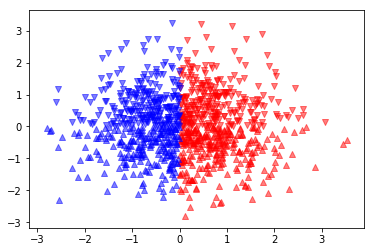

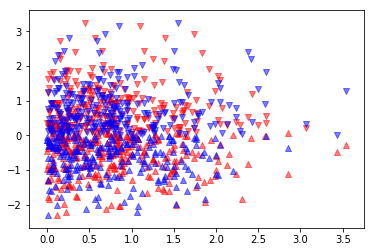

In [30]:
def synthetic():
    n = 1000
    data = np.random.multivariate_normal([0,0], [[1,0],[0, 1]], size=n)

    x = pd.DataFrame(data)
    x['cat'] = 1 * (x[0] < 0)
    x['credit'] = 1 * (x[1] < 0)

    def get_Xtarget(data):
        return visualize.get_Xtarget(data, 'cat', ['credit'])

    repairer = bba.repairers.GeneralRepairer.Repairer(x.values.tolist(), 2, 1.0, True, features_to_ignore = [3])
    repaired_x = pd.DataFrame.from_records(repairer.repair(x.values.tolist()), columns=x.columns)
    
    plt.figure()
    plt.title('Before repair')
    visualize.plot2(x[[0,1]], x['cat'], x['credit'])
    plt.figure()
    plt.title('After repair')
    visualize.plot2(repaired_x[[0,1]], repaired_x['cat'], repaired_x['credit'])

synthetic()

### 5.3.2 German Credit Dataset

We are going to show the effect of repairing the German Credit Dataset in regards to the gender and age of the participant. Gender and age are treated as binary attributes with genders binarized as male and female, and age binarized as yound and old with a threshold of 25 years, which has been shown to have the strongest discriminative effect in the dataset. 

For this experiment, the data is represented by 63 dimensions after one-hot encoding all categorical attributes. To be able to visualize this in a meaningful way while also making it obvious how the classification quality changes, we project the dataset into a two-dimensional embedding. The axes are chosen as the normal vectors of the separating planes of classifiers trained on reconstructing the protected attributes and predicting the credit rating, respectively. So, the x axis equals the decision value of a linear classifier for reconstructing the protected attribute (gender or age), and the y axis equals the decision value of a linear classifier for predicting the credit rating. If the x value is bigger than zero, it is part of one category as determind by the classifier; if the x value is less than zero, it is part of the other category. The same applies for the y value.

For gender, see the first figure. Red and blue coloring shows the actual gender, and upper and lower triangles show the actual credit rating. We can clearly see that the gender can be reconstructed quite well in the original dataset, whereas after applying the repair algorithm, reconstruction is much more difficult as the data mixes much better.

For age, see the second figure. Red and blue coloring shows the actual age, and upper and lower triangles show the actual credit rating. Again, in the original dataset, there is a asymmetry that can be used for reconstruction, whereas after applying the repair algorithm, the age categories mix much better.


#### Visualization of the German Credit Dataset by gender and credit rating

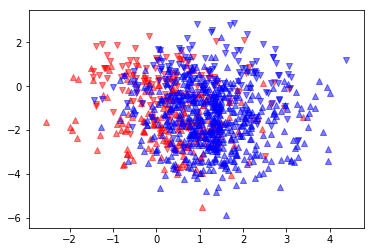

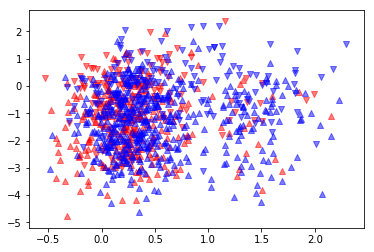

In [32]:
compare_by(data, repaired_data, get_sex_Xtarget);

#### Visualization of the German Credit Dataset by age category (<> 25 years) and credit rating

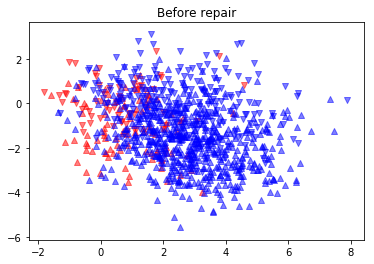

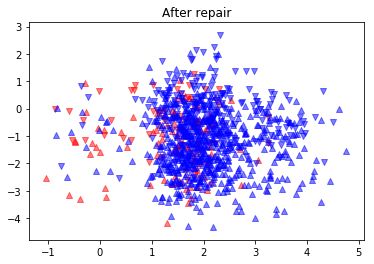

In [19]:
compare_by(data, repaired_data, get_age_cat_Xtarget)